In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import gc
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

/Users/shikatahiro/.pyenv/versions/anaconda3-4.2.0/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [2]:
df = pd.DataFrame(pd.read_csv('/Users/shikatahiro/dev/vol3-master/kato_and_hoshino/q_data_x.csv'))

In [3]:
#drop z_vec and y_vec
x_train = df.drop(['cm_dummy', 'gamedummy', 'gamecount', 'gamesecond'], axis=1)
eval_data=x_train
z1_true = pd.Series(df["cm_dummy"])

/Users/shikatahiro/.pyenv/versions/anaconda3-4.2.0/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7854712010385678
                  0            1
0        area_kanto     0.401336
1       area_keihan      0.60171
2        area_tokai    -0.196038
3   area_keihanshin     -1.09043
4               age   -0.0243165
5               sex    -0.139786
6       marry_dummy    0.0747243
7        job_dummy1     -0.24285
8        job_dummy2    -0.012289
9        job_dummy3    0.0620165
10       job_dummy4    0.0109754
11       job_dummy5     0.124548
12       job_dummy6    -0.070026
13       job_dummy7    -0.118906
14       job_dummy8    -0.036889
15              inc -0.000155393
16           pmoney    0.0104388
17   fam_str_dummy1   -0.0570686
18   fam_str_dummy2     0.105881
19   fam_str_dummy3   -0.0936267
20   fam_str_dummy4     -0.16851
21   fam_str_dummy5   -0.0700956
22      child_dummy   -0.0057056
23                T   -0.0240861
24               F1    -0.386595
25               F2      0.25085
26               F3   -0.0244541
27               M1    -0.263526
28               M2   -0

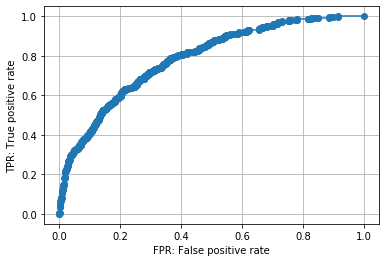

In [5]:
#logistic regression------------------------------------
lr = LogisticRegression()
lr.fit(x_train, z1_true)
z_preds_lr=lr.predict_proba(eval_data)
fpr, tpr, threshold = roc_curve(z1_true,z_preds_lr[:,1])

plt.plot(fpr, tpr, marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()

print(roc_auc_score(z1_true, z_preds_lr[:,1]))

coeff_df = pd.DataFrame([x_train.columns, lr.coef_[0]]).T
print(coeff_df)

/Users/shikatahiro/.pyenv/versions/anaconda3-4.2.0/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7954132777390974
                  0            1
0        area_kanto     0.305928
1       area_keihan     0.313512
2        area_tokai   -0.0324919
3   area_keihanshin    -0.571285
4               age    -0.194646
5               sex    -0.564844
6       marry_dummy   -0.0427069
7        job_dummy1   -0.0673481
8        job_dummy2    -0.024882
9        job_dummy3    0.0588605
10       job_dummy4  1.24229e-05
11       job_dummy5     0.105321
12       job_dummy6    0.0186897
13       job_dummy7   -0.0387299
14       job_dummy8   -0.0472039
15              inc    -0.116594
16           pmoney    0.0481631
17   fam_str_dummy1    0.0230895
18   fam_str_dummy2     0.123624
19   fam_str_dummy3   -0.0317349
20   fam_str_dummy4     -0.10922
21   fam_str_dummy5   -0.0655798
22      child_dummy     0.120894
23                T   -0.0232786
24               F1     -0.41506
25               F2    -0.151519
26               F3    -0.180564
27               M1    0.0964293
28               M2     

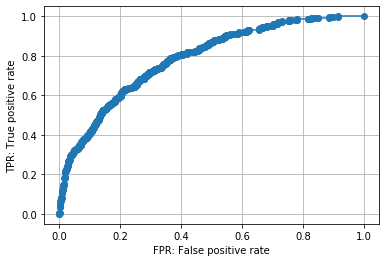

In [9]:
#logistic regression(standarization)------------------------------------
sscaler=preprocessing.StandardScaler()
lr_scale = LogisticRegression()
sscaler.fit(x_train)
x_train_scale=sscaler.transform(x_train)
eval_data_scale=x_train_scale
lr_scale.fit(x_train_scale, z1_true)
z_preds_lr_scale=lr_scale.predict_proba(eval_data_scale)

fpr, tpr, threshold = roc_curve(z1_true,z_preds_lr[:,1])

plt.plot(fpr, tpr, marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()

print(roc_auc_score(z1_true, z_preds_lr_scale[:,1]))

coeff_df = pd.DataFrame([x_train.columns, lr_scale.coef_[0]]).T
print(coeff_df)

/Users/shikatahiro/.pyenv/versions/anaconda3-4.2.0/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9999998763766695


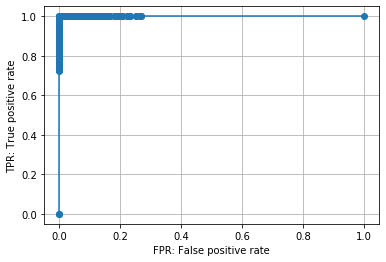

In [10]:
#SVM-------------------------------------------------
svc=svm.SVC(probability=True)
svc.fit(x_train, z1_true)
eval_data=x_train
z_preds_svc=svc.predict_proba(eval_data)
fpr, tpr, threshold = roc_curve(z1_true,z_preds_svc[:,1])

plt.plot(fpr, tpr, marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()

print(roc_auc_score(z1_true, z_preds_svc[:,1]))

,importance
TVwatch_day,11572
inc,3512
pmoney,2990
age,2151
child_dummy,850
area_keihan,811
fam_str_dummy3,754
M2,668
marry_dummy,590
job_dummy1,532


0.9999950550667764


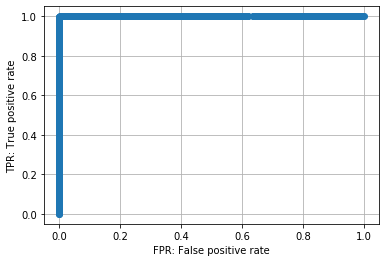

In [12]:
#light gbm-------------------------------------------
train_data = lgb.Dataset(x_train, label=z1_true)
params={'task':'train'
        ,'boosting_type':'gbdt'
        ,'objective':'binary'
        ,'verbose':2
        }

model=lgb.train(params
        ,train_data
        ,num_boost_round=1000
        )

importance = pd.DataFrame(model.feature_importance(), index=x_train.columns, columns=['importance'])
display(importance.sort_values(by='importance', ascending=False))

z_preds_lgb=model.predict(eval_data)

fpr, tpr, threshold = roc_curve(z1_true,z_preds_lgb)

plt.plot(fpr, tpr, marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()
#plt.savefig('data/dst/sklearn_roc_curve.png')

print(roc_auc_score(z1_true, z_preds_lgb))

In [21]:
#concat ps
df_lr = pd.concat([df, pd.Series(z_preds_lr[:,1]).rename('p_score')],axis=1)
df_lr_scale = pd.concat([df, pd.Series(z_preds_lr_scale[:,1]).rename('p_score')],axis=1)
df_svc = pd.concat([df, pd.Series(z_preds_svc[:,1]).rename('p_score')],axis=1)
df_lgb = pd.concat([df, pd.Series(z_preds_lgb).rename('p_score')],axis=1)

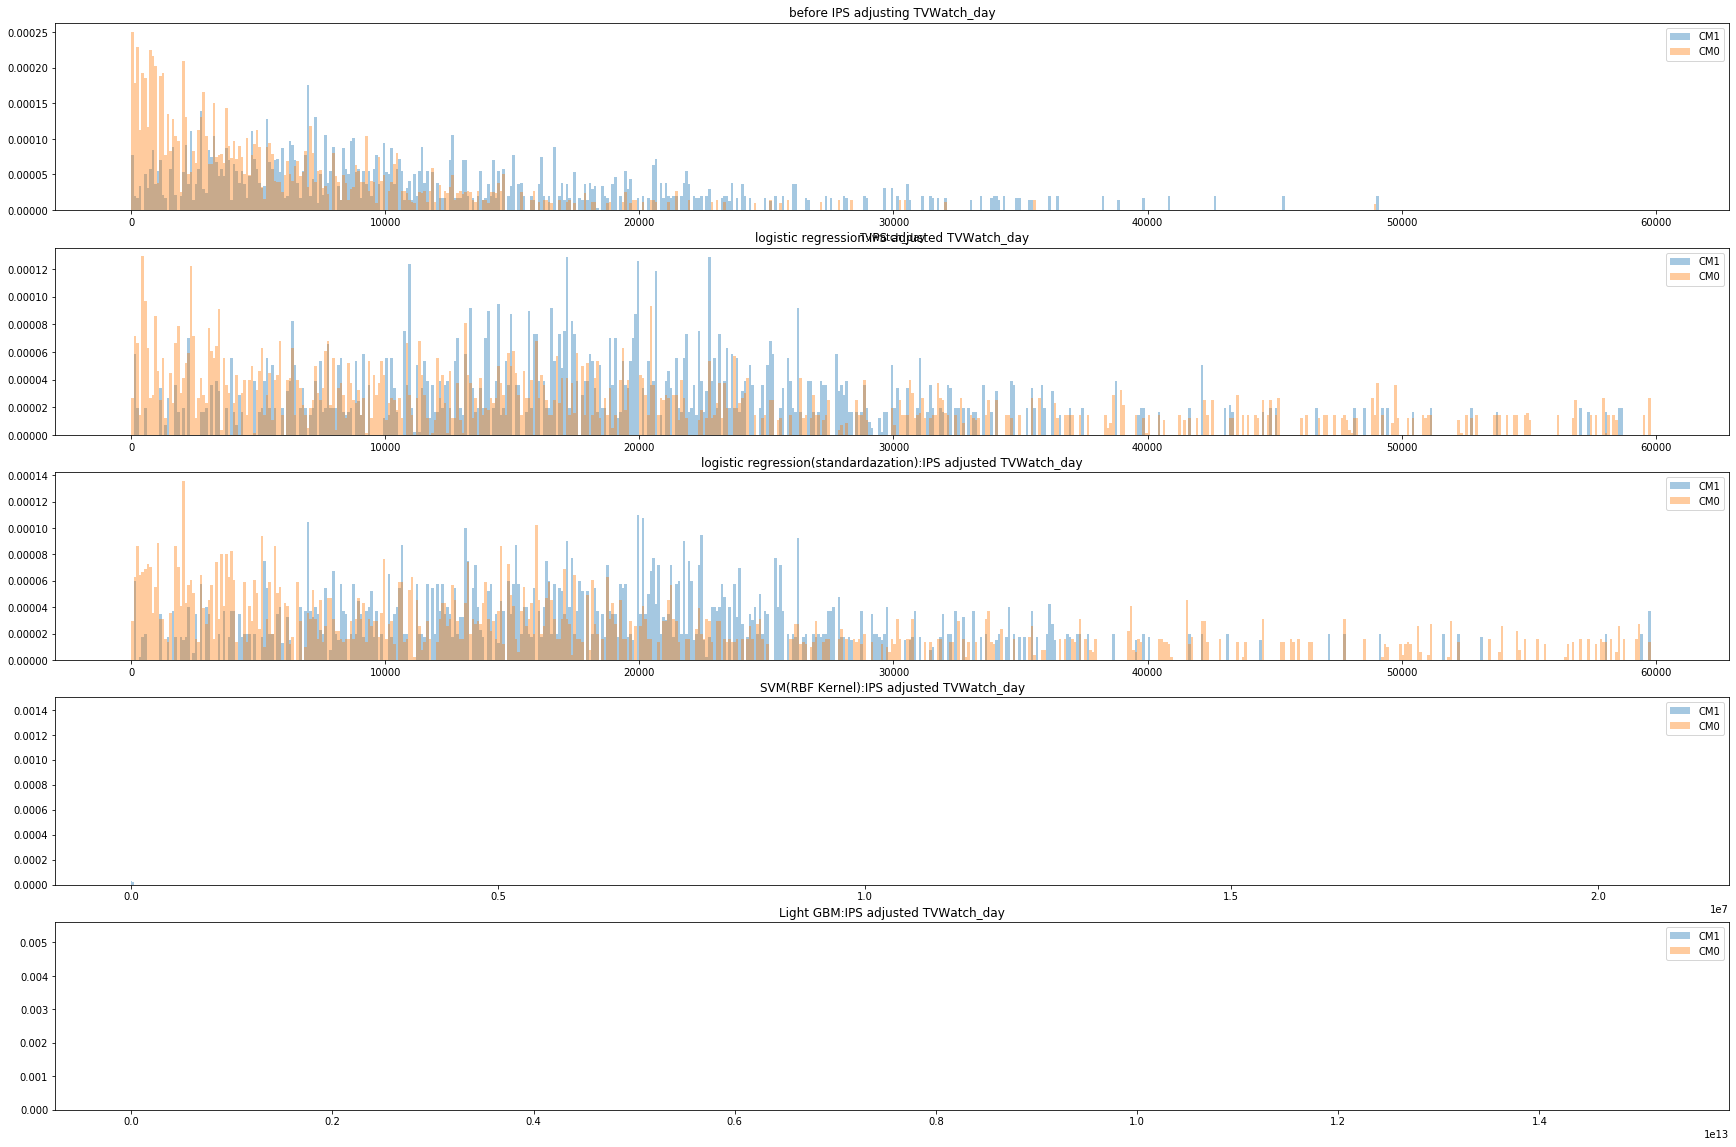

In [24]:
#IPWed distribution--------------------------
fig, axes = plt.subplots(nrows=5, figsize=(30, 20))
sns.distplot(df.query('cm_dummy==1')['TVwatch_day'], kde=False, norm_hist=True, bins=np.arange(0,60000,100), ax=axes[0], label='CM1')
sns.distplot(df.query('cm_dummy==0')['TVwatch_day'], kde=False, norm_hist=True, bins=np.arange(0,60000,100), ax=axes[0], label='CM0')
sns.distplot(df_lr.query('cm_dummy==1')['TVwatch_day']/df_lr.query('cm_dummy==1')['p_score'], kde=False, norm_hist=True, bins=np.arange(0,60000,100), ax=axes[1], label='CM1')
sns.distplot(df_lr.query('cm_dummy==0')['TVwatch_day']/df_lr.query('cm_dummy==0')['p_score'], kde=False, norm_hist=True, bins=np.arange(0,60000,100), ax=axes[1], label='CM0')
sns.distplot(df_lr_scale.query('cm_dummy==1')['TVwatch_day']/df_lr_scale.query('cm_dummy==1')['p_score'], kde=False, norm_hist=True, bins=np.arange(0,60000,100), ax=axes[2], label='CM1')
sns.distplot(df_lr_scale.query('cm_dummy==0')['TVwatch_day']/df_lr_scale.query('cm_dummy==0')['p_score'], kde=False, norm_hist=True, bins=np.arange(0,60000,100), ax=axes[2], label='CM0')
sns.distplot(df_svc.query('cm_dummy==1')['TVwatch_day']/df_svc.query('cm_dummy==1')['p_score'], kde=False, norm_hist=True, bins=np.arange(0,60000,100), ax=axes[3], label='CM1')
sns.distplot(df_svc.query('cm_dummy==0')['TVwatch_day']/df_svc.query('cm_dummy==0')['p_score'], kde=False, norm_hist=True, bins=np.arange(0,60000,100), ax=axes[3], label='CM0')
sns.distplot(df_lgb.query('cm_dummy==1')['TVwatch_day']/df_lgb.query('cm_dummy==1')['p_score'], kde=False, norm_hist=True, bins=np.arange(0,60000,100), ax=axes[4], label='CM1')
sns.distplot(df_lgb.query('cm_dummy==0')['TVwatch_day']/df_lgb.query('cm_dummy==0')['p_score'], kde=False, norm_hist=True, bins=np.arange(0,60000,100), ax=axes[4], label='CM0')

axes[0].legend()
axes[1].legend()
axes[2].legend()
axes[3].legend()
axes[4].legend()
axes[0].set_title('before IPS adjusting TVWatch_day')
axes[1].set_title('logistic regression:IPS adjusted TVWatch_day')
axes[2].set_title('logistic regression(standardazation):IPS adjusted TVWatch_day')
axes[3].set_title('SVM(RBF Kernel):IPS adjusted TVWatch_day')
axes[4].set_title('Light GBM:IPS adjusted TVWatch_day')
plt.show()

In [40]:

df_lgb.query('cm_dummy==1')['p_score'].sort_values()

7469    0.497374
8435    0.497374
8909    0.497374
7956    0.497374
6993    0.497374
          ...   
7803    1.000000
5906    1.000000
9249    1.000000
8771    1.000000
7327    1.000000
Name: p_score, Length: 4144, dtype: float64

In [41]:
#極端に小さい傾向スコア
df_lgb.query('cm_dummy==0')['p_score'].sort_values()

4945    2.307065e-13
4269    2.307065e-13
3588    2.307065e-13
2224    2.307065e-13
1550    2.307065e-13
            ...     
1823    5.020634e-01
3870    5.020634e-01
1600    7.301962e-01
4322    7.301962e-01
2277    7.301962e-01
Name: p_score, Length: 5856, dtype: float64

In [36]:
df.groupby(['cm_dummy'])['TVwatch_day'].agg(['count', 'mean', 'median'])

,count,mean,median
cm_dummy,,,
0,5856,5714.982257,4026.437247
1,4144,11461.881259,9098.373953


In [39]:
#ロジスティック回帰で補正後
pd.DataFrame({
    'cm_dummy': df_lr['cm_dummy'],
    'cm_dummy_with_ips': df_lr['TVwatch_day']/df_lr['p_score']
}).groupby(['cm_dummy'])['cm_dummy_with_ips'].agg(['count', 'mean', 'median'])

,count,mean,median
cm_dummy,,,
0,5856,19962.647186,15100.702121
1,4144,19581.092807,18248.119835


In [42]:
pd.DataFrame({
    'cm_dummy': df_lgb['cm_dummy'],
    'cm_dummy_with_ips': df_lgb['TVwatch_day']/df_lgb['p_score']
}).groupby(['cm_dummy'])['cm_dummy_with_ips'].agg(['count', 'mean', 'median'])

,count,mean,median
cm_dummy,,,
0,5856,1.512976e+13,7.220391e+07
1,4144,1.148392e+04,9.198271e+03
